In [1]:
import os
import numpy as np
import sep
import seaborn 
import pandas as pd
from astropy.io import fits
from astropy.io import ascii
import matplotlib.pyplot as plt 
import matplotlib.cm as cm

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
%matplotlib inline

In [3]:
data_path = os.path.abspath('/home/bos0109/sersic/work/rhino/data/extract_test/')

In [4]:
master_l = os.path.join(data_path, 'master2010_masked_wcs.fits')

In [5]:
ml = fits.getdata(master_l)

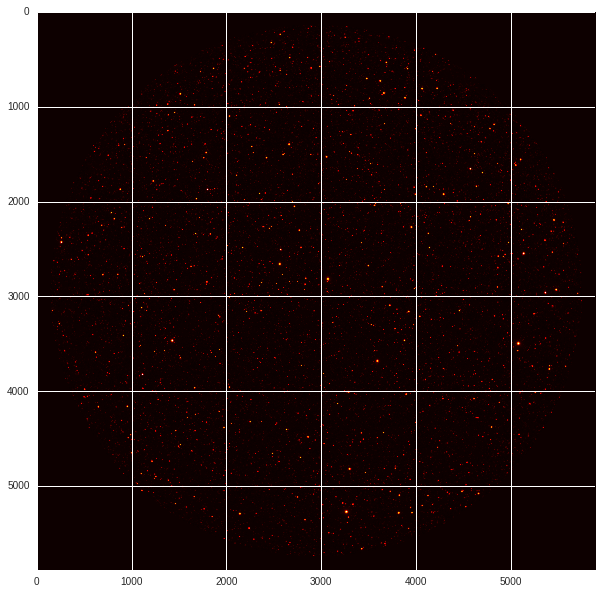

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(np.log10(ml), cmap=cm.hot)

In [7]:
master_l =  fits.open(master_l)

In [8]:
ml = ml.byteswap().newbyteorder()

(array([  3.46051540e+07,   1.21830000e+04,   2.57100000e+03,
          1.20000000e+01,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.53600000e+03]),
 array([   487.26171875,   6992.13554687,  13497.009375  ,  20001.88320312,
         26506.75703125,  33011.63085938,  39516.5046875 ,  46021.37851563,
         52526.25234375,  59031.12617187,  65536.        ]),
 <a list of 10 Patch objects>)

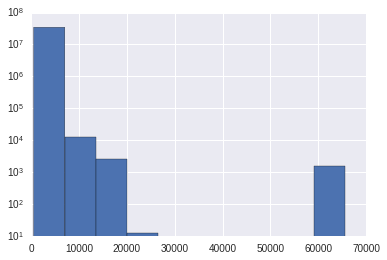

In [9]:
plt.hist(master_l[0].data.flatten(), log=True)

In [10]:
sources = sep.extract(ml, 550)

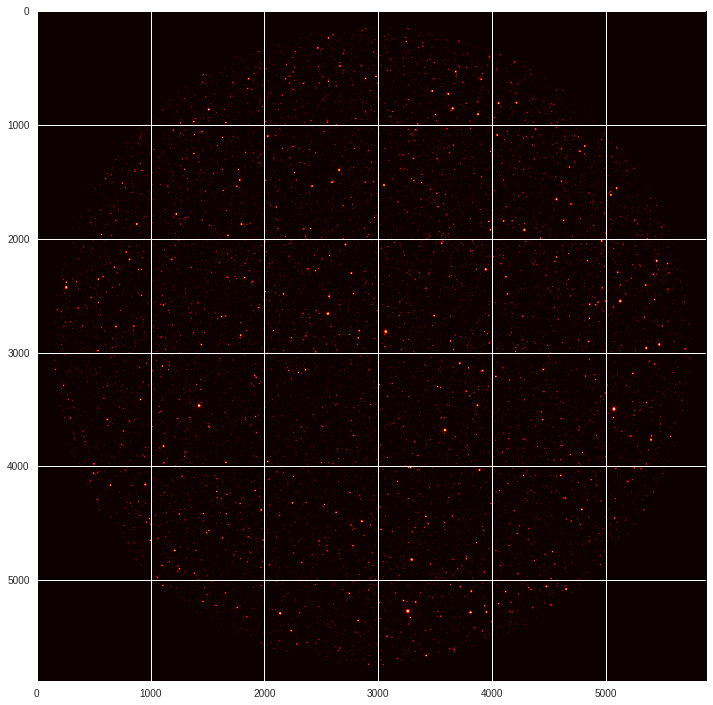

In [32]:
plt.figure(figsize=(12,12))
plt.imshow(np.log10(ml), cmap=cm.hot)
#plt.plot(sources['x'], sources['y'], '.b')

In [12]:
len(sources)

10915

In [13]:
stars = os.path.join(data_path, 'stellar/CSTAR/cats/stars.dat') 
stars = ascii.read(stars, names= ['cstarid','x','y','imag'])
stars = stars.to_pandas()
stars['objID'] = range(len(stars))

In [14]:
import astroML.crossmatch as cx

In [15]:
S = np.array([stars['x'], stars['y']]).T
O = np.array([sources['x'], sources['y']]).T

In [16]:
distr, indr  = cx.crossmatch(S, O, max_distance=1.5)

In [17]:
matchsr = ~np.isinf(distr)

In [18]:
distl, indl  = cx.crossmatch(O, S, max_distance=1.5)

In [19]:
matchsl = ~np.isinf(distl)

In [20]:
objID = np.zeros_like(O[:,0]) -1
CSTARID = np.zeros_like(O[:,0]) -1
for i in range(len(O)):
    if distl[i] != np.inf: 
        dist_o = distl[i]
        ind_o  = indl[i]
        # now ind is a star number
        # lets see if that star has matched the same obj
        if distr[ind_o] != np.inf:
            dist_s = distr[ind_o]
            ind_s = indr[ind_o]
            if ind_s == i:
                objID[i] = ind_o  
                CSTARID[i] = stars['cstarid'][ind_o]

In [21]:
sum(objID > 0)

0

In [22]:
import astroalign

In [23]:
images_path = os.path.join(data_path, 'stellar/CSTAR/images')
master_Ryan = os.path.join(images_path, 'master10_wcs.fits')

In [24]:
mr = fits.getdata(master_Ryan)
ml = master_l[0].data

In [25]:
imr = astroalign.align.align_image(mr, ml)

(300, 600)

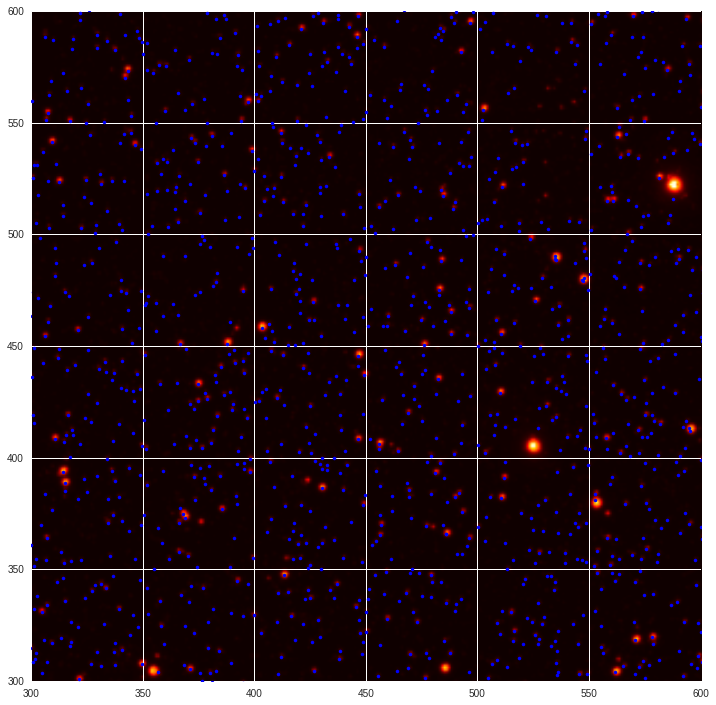

In [40]:
plt.figure(figsize=(12,12))
plt.imshow(np.log10(imr), cmap=cm.hot)
plt.plot(stars['x'], stars['y'], '.b')
plt.xlim((300,600))
plt.ylim((300,600))

(300, 600)

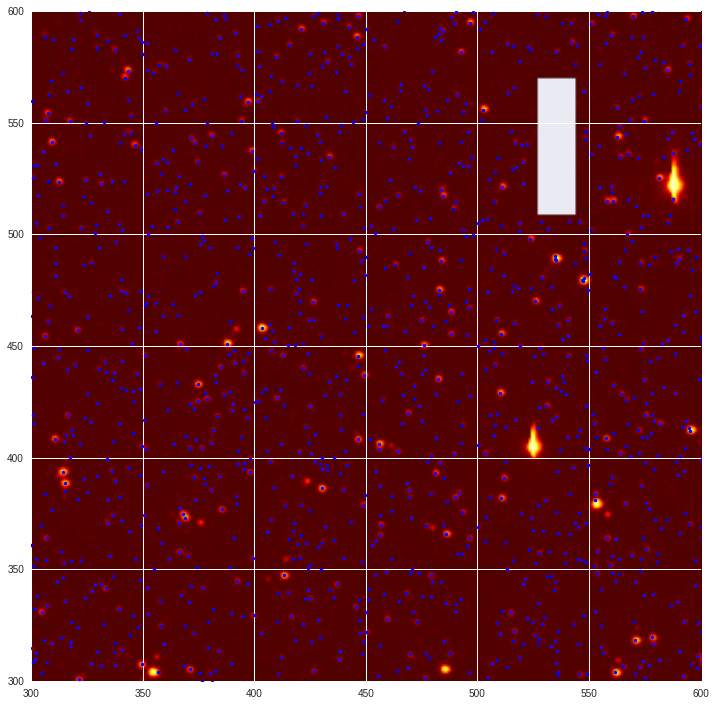

In [41]:
plt.figure(figsize=(12,12))
plt.imshow(np.log10(mr), cmap=cm.hot)
plt.plot(stars['x'], stars['y'], '.b')
plt.xlim((300,600))
plt.ylim((300,600))